## Business Problem

Ecommerce company based in a City that sells clothing online but they also have in-store style and clothing advice sessions. 
Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.
The company is trying to <b> Decide whether to focus their efforts on their mobile app experience or their website. </b>


## About the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

## Loading the required modules 
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')


In [114]:
customers = pd.read_csv("Ecommerce Customers.csv")

In [115]:
customers_clean = customers.drop(columns = ['Email','Address','Avatar'],axis=1)


## Dealing with Categorical Variables

In [116]:
customers_clean = pd.get_dummies(data=customers_clean, drop_first=True,dtype='int8')

In [117]:
customers_clean.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Gender_Male
0,34.374258,15.126994,37.157624,5.377594,765.518462,0
1,34.603311,12.207298,33.913847,6.922689,744.221867,1
2,33.256335,13.858062,37.780265,5.976768,725.584814,1
3,34.967610,13.919494,37.952013,5.066697,712.396327,0
4,34.385820,12.729720,36.232110,5.705941,708.935185,0


## Data Preparation for model building 

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [118]:
customers_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
 5   Gender_Male           500 non-null    int8   
dtypes: float64(5), int8(1)
memory usage: 20.1 KB


In [119]:
X = customers_clean.drop(['Yearly Amount Spent'],axis=1)
y = customers_clean['Yearly Amount Spent']

In [120]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [122]:
num_vars = ['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership']

In [123]:
scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [124]:
# adding the Constant term
X_trainReg = sm.add_constant(X_train)
X_testReg = sm.add_constant(X_test)


## Training the Model

Now its time to train our model on our training data!



## Multiple Regression model - R style

In [125]:
model = sm.OLS(y_train, X_trainReg)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.020
Model:                             OLS   Adj. R-squared:                  0.008
Method:                  Least Squares   F-statistic:                     1.623
Date:                 Thu, 24 Mar 2022   Prob (F-statistic):              0.153
Time:                         16:59:53   Log-Likelihood:                -3408.2
No. Observations:                  400   AIC:                             6828.
Df Residuals:                      394   BIC:                             6852.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

In [127]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [128]:
influence_points = OLSInfluence(results) # results is output from the lm model built earlier

pd.DataFrame(influence_points.influence).describe()

,0
count,400.000000
mean,1.879549
std,47.423269
min,-47.966569
25%,-2.205530
50%,-0.544450
75%,0.708627
max,932.247781


In [129]:
influence_data = pd.DataFrame(influence_points.influence[influence_points.influence>=10])
customers_clean['influence_value']= influence_points.influence
customers_clean.loc[influence_data.index,].sort_values(['influence_value'], ascending = False).head(10)


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Gender_Male,influence_value
499,32.836941,10.256549,36.143908,0.789520,25006.670580,1,932.247781
1,34.603311,12.207298,33.913847,6.922689,744.221867,1,103.141658
5,34.507551,12.893669,37.635756,5.705154,700.917092,1,57.076581
0,34.374258,15.126994,37.157624,5.377594,765.518462,0,38.217472
11,33.215472,12.135101,37.142094,5.840506,663.803693,1,31.923832
16,34.402410,14.220979,37.523197,4.077775,647.619456,1,31.901354
21,33.871038,12.026925,34.476878,5.493507,637.102448,1,25.510308
25,33.540479,12.884125,36.226042,5.007272,628.047804,1,20.022987
3,34.967610,13.919494,37.952013,5.066697,712.396327,0,19.330839
7,32.533240,14.121784,38.406329,5.320094,689.235700,0,17.240197


### Handling the outliers and Infleuntial points 

In [130]:

customers_clean1 = customers_clean[customers_clean.influence_value<=10]

In [131]:
print('Data Size before removing outliers {}'.format(customers_clean.shape))
print('Date Size after removing outliers {}'.format(customers_clean1.shape))

Data Size before removing outliers (500, 7)
Date Size after removing outliers (385, 7)


In [143]:
customers_clean1.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Gender_Male,influence_value
10,34.482388,13.283033,35.907298,4.968743,666.125592,0,6.691685
13,32.407148,13.808799,37.426769,5.039955,662.961088,0,7.861432
17,32.931336,12.732212,35.600821,5.485977,642.101579,0,5.393969
20,35.039283,14.426491,37.374184,3.930615,640.187740,0,9.531983
22,33.085298,13.093537,38.315648,4.750360,632.123588,0,4.412076


In [144]:
X = customers_clean1.drop(['Yearly Amount Spent','influence_value'],axis=1)
y = customers_clean1['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
# adding the Constant term
X_reg = sm.add_constant(X_train)
X_reg.head()

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership,Gender_Male
232,1.0,33.694898,11.202670,35.493964,4.015987,0
451,1.0,34.606242,11.761884,38.126520,1.820811,1
380,1.0,33.863189,11.523523,35.938045,3.013033,1
261,1.0,33.914015,12.266504,36.575031,3.023474,1
103,1.0,33.551651,11.936895,35.900253,4.543332,0


In [145]:
from scipy import stats


## Standardizing the data 


In [146]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

In [147]:
num_vars = ['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership']

In [148]:
X = customers_clean1.drop(['Yearly Amount Spent','influence_value'],axis=1)


In [149]:
y = customers_clean1['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [150]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [151]:
# adding the Constant term
X_reg = sm.add_constant(X_train)
X_reg.head()

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership,Gender_Male
232,1.0,0.640389,-0.818373,-1.559405,0.594869,0
451,1.0,1.554709,-0.240155,1.091997,-1.741790,1
380,1.0,0.809229,-0.486617,-1.112145,-0.472727,1
261,1.0,0.860222,0.281613,-0.470599,-0.461612,1
103,1.0,0.496674,-0.059197,-1.150208,1.156203,0


In [152]:
scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])
# adding the Constant term
X_trainReg = sm.add_constant(X_train)
X_testReg = sm.add_constant(X_test)


In [153]:
model = sm.OLS(y_train, X_trainReg)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.982
Model:                             OLS   Adj. R-squared:                  0.982
Method:                  Least Squares   F-statistic:                     3290.
Date:                 Thu, 24 Mar 2022   Prob (F-statistic):          6.14e-261
Time:                         17:01:09   Log-Likelihood:                -1135.3
No. Observations:                  308   AIC:                             2283.
Df Residuals:                      302   BIC:                             2305.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

## ## Model refinement - Using Sequential Feature selection

In [154]:
# Python style of Linear Regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [155]:
lm.fit(X_train,y_train)

LinearRegression()

In [75]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [81]:
sfs = SFS(lm,
         k_features='best',
         forward=False,
         floating=False,
         scoring='r2',
         cv=5)

sfs = sfs.fit(X_train,y_train)

In [82]:
sfs_results = pd.DataFrame.from_dict(sfs.get_metric_dict(confidence_interval=0.95)).T
sfs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
5,"(0, 1, 2, 3, 4)","[0.9806634823408198, 0.9826243870779449, 0.978...",0.980454,"(Avg. Session Length, Time on App, Time on Web...",0.002021,0.001572,0.000786
4,"(0, 1, 3, 4)","[0.9806740667576824, 0.9826702007778354, 0.978...",0.980532,"(Avg. Session Length, Time on App, Length of M...",0.002001,0.001557,0.000778
3,"(0, 1, 3)","[0.979945901431019, 0.9813558648213505, 0.9795...",0.979802,"(Avg. Session Length, Time on App, Length of M...",0.001362,0.001059,0.00053
2,"(1, 3)","[0.8514502469661143, 0.8531001956622152, 0.825...",0.85108,"(Time on App, Length of Membership)",0.019563,0.01522,0.00761
1,"(3,)","[0.6167849166711126, 0.6666926794539225, 0.558...",0.601005,"(Length of Membership,)",0.07276,0.05661,0.028305


### Picking the best model visually¶

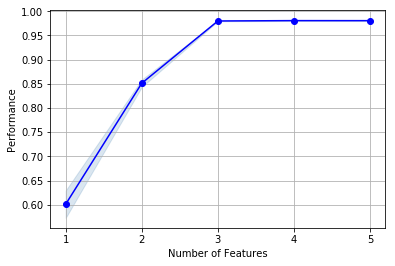

In [84]:
plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.grid()
plt.show()

## Multi-collinearity

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [94]:
vif_data["feature"] 

0     Avg. Session Length
1             Time on App
2         Time on Website
3    Length of Membership
4     Yearly Amount Spent
5             Gender_Male
Name: feature, dtype: object

In [95]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = customers_clean1.drop(['influence_value','Gender_Male'],axis=1).columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values(['VIF'],ascending=False)

,feature,VIF
2,Time on Website,877.292678
0,Avg. Session Length,644.484163
1,Time on App,171.340841
3,Length of Membership,25.561017
4,Yearly Amount Spent,4.298223


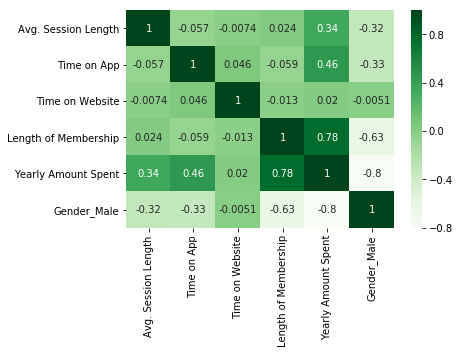

In [96]:
sns.heatmap(customers_clean1.drop(['influence_value'],axis=1).corr(),annot=True,cmap='Greens')

## Recursive Feature Elimination

In [97]:
from sklearn.feature_selection import RFE


In [98]:
indp_vars = X
min_aic = 10**100 # initiailizing AIC to a very large value 
for i in range(indp_vars.shape[1],0,-1):
    regression_model = LinearRegression()
    rfe = RFE(regression_model, n_features_to_select=i)
    rfe = rfe.fit(X_train, y_train)
    chk = X_train.loc[:,list(rfe.support_)]
    print(chk.columns)
    regression_model=sm.OLS(y_train,chk)
    result=regression_model.fit()
    current_aic = result.aic
    print(current_aic)
    if(current_aic <= min_aic):
        min_aic = current_aic
        bestmodel = chk.columns
    else:
        print("Break !")
        break

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Gender_Male'],
      dtype='object')
4273.1392769004815
Index(['Avg. Session Length', 'Time on App', 'Length of Membership',
       'Gender_Male'],
      dtype='object')
4271.183521751131
Index(['Avg. Session Length', 'Time on App', 'Length of Membership'], dtype='object')
4698.72926848347
Break !


In [99]:
bestmodel

Index(['Avg. Session Length', 'Time on App', 'Length of Membership',
       'Gender_Male'],
      dtype='object')

In [100]:
bestmodel_data = X_train.loc[:,bestmodel]
bestmodel_data['intercept'] =1
bestmodel_data.head()
regression_model=sm.OLS(y_train,bestmodel_data)
result=regression_model.fit()
print(result.summary2())

                    Results: Ordinary least squares
Model:               OLS                  Adj. R-squared:      0.982    
Dependent Variable:  Yearly Amount Spent  AIC:                 2281.2132
Date:                2022-03-24 16:00     BIC:                 2299.8637
No. Observations:    308                  Log-Likelihood:      -1135.6  
Df Model:            4                    F-statistic:         4118.    
Df Residuals:        303                  Prob (F-statistic):  1.18e-262
R-squared:           0.982                Scale:               94.875   
------------------------------------------------------------------------
                      Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
------------------------------------------------------------------------
Avg. Session Length   24.1735   0.6283  38.4743 0.0000  22.9371  25.4099
Time on App           36.4036   0.6589  55.2451 0.0000  35.1069  37.7003
Length of Membership  55.7015   0.8049  69.2018 0.0000  54.1176  57.2855

## Transformations on the data 

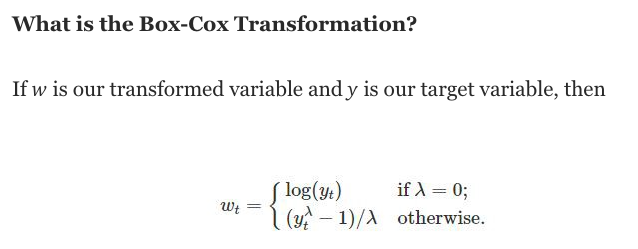

In [101]:
Image("box-cox.png",height=800 , width=600)


In [102]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

y_bc,lam, ci= boxcox(customers_clean['Yearly Amount Spent'],alpha=0.05)

print('The Lambda value  is ',lam)

print('Confidence interval is ',ci)
#lam

# it did not perform better for this model, so log transform is used
#customers_clean['Yearly Amount Spent'] = y_bc 



The Lambda value  is  -0.8369461723904743
Confidence interval is  (-1.005876538262102, -0.689626833826291)


In [108]:
transformed = (customers_clean1['Yearly Amount Spent']**lam-1)/lam

In [109]:
print("\n*** The orginal data *** \n")
print(np.array(customers_clean['Yearly Amount Spent'] [:5]))

print("\n*** Transformed Data *** \n")
print(np.array(transformed[:5]))
print("\n*** Inverse Transformed Data *** \n")
print(inv_boxcox(y_bc, lam)[:5])



*** The orginal data *** 

[765.5184619 744.2218671 725.5848141 712.3963268 708.9351849]

*** Transformed Data *** 

[1.18964226 1.18962158 1.18948061 1.18946725 1.18941016]

*** Inverse Transformed Data *** 

[765.5184619 744.2218671 725.5848141 712.3963268 708.9351849]


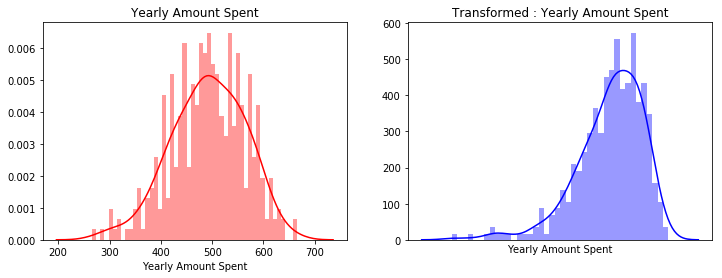

In [110]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(customers_clean1['Yearly Amount Spent'],bins=50,color='r',ax=ax)
ax.set_title('Yearly Amount Spent')

ax=f.add_subplot(122)
sns.distplot(transformed,bins=40,color='b',ax=ax)
ax.set_title('Transformed : Yearly Amount Spent')
ax.set_xscale('log');

### Log Transformations on the data 


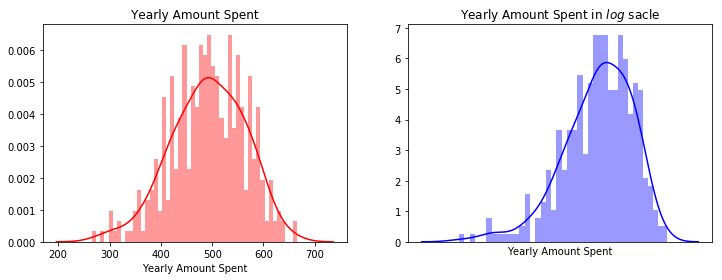

In [112]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(customers_clean1['Yearly Amount Spent'],bins=50,color='r',ax=ax)
ax.set_title('Yearly Amount Spent')

ax=f.add_subplot(122)
sns.distplot(np.log10(customers_clean1['Yearly Amount Spent']),bins=40,color='b',ax=ax)
ax.set_title('Yearly Amount Spent in $log$ sacle')
ax.set_xscale('log');